# Brazilian Houses To Rent 

# Columns
- id
- city: City where the property is located
- area:Area do imovel / Property area
- rooms:Numero de quartos/ Quantity of rooms
- bathroom:Numero de banheiros / Quantity of bathroom
- parking spaces:Numero de vagas / Quantity of parking spaces
- floor:Andar / Floor
- animal:Aceita animais? / Acept animals?
- furniture: Mobilhada? / Furniture?
- hoa: Valor do condominio / Homeowners association tax
- rent amount: Valor do Aluguel / Rent amount
- property tax: IPTU / Property tax
- fire insurance: Seguro Incendio / Fire Insurance
- total: Valor total / Total

# Goal 

We will examine the effects of the variables 'furniture', 'animal', 'floor', 'parking spaces', 'bathroom', 'rooms', 'area' and 'city' on our target variable 'total'. Our aim is to predict our target variable correctly by guessing if our dependent variables are not provided. In summary; To be able to estimate house prices in Brazil according to the criteria of dependent variables.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
df.shape

(10692, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


'floor' must be a symbol or string expression inside the variable because the object type appears as info () appears.

In [6]:
df.floor.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [7]:
df["floor"] = df["floor"].apply(str.strip).replace("-", np.nan)
df["floor"] = pd.to_numeric(df["floor"], downcast="float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  8231 non-null float32
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: float32(1), int64(9), object(3)
memory usage: 1.0+ MB


# Missing Value 

In [9]:
df.isnull().sum()*100/df.shape[0]

city                    0.000000
area                    0.000000
rooms                   0.000000
bathroom                0.000000
parking spaces          0.000000
floor                  23.017209
animal                  0.000000
furniture               0.000000
hoa (R$)                0.000000
rent amount (R$)        0.000000
property tax (R$)       0.000000
fire insurance (R$)     0.000000
total (R$)              0.000000
dtype: float64

In [10]:
df["floor"].fillna(np.mean(df.floor), inplace=True)

In [11]:
df.isnull().sum()*100/df.shape[0]

city                   0.0
area                   0.0
rooms                  0.0
bathroom               0.0
parking spaces         0.0
floor                  0.0
animal                 0.0
furniture              0.0
hoa (R$)               0.0
rent amount (R$)       0.0
property tax (R$)      0.0
fire insurance (R$)    0.0
total (R$)             0.0
dtype: float64

# Outlier Values

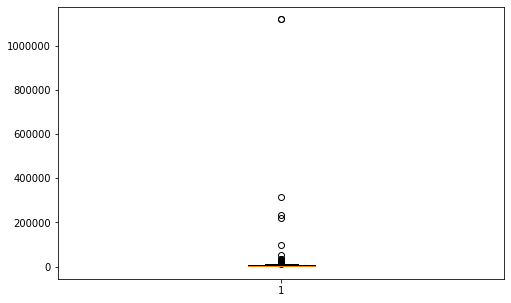

In [12]:
plt.figure(figsize=(8,5))
plt.boxplot(df['total (R$)'])
plt.show()

# Histogram

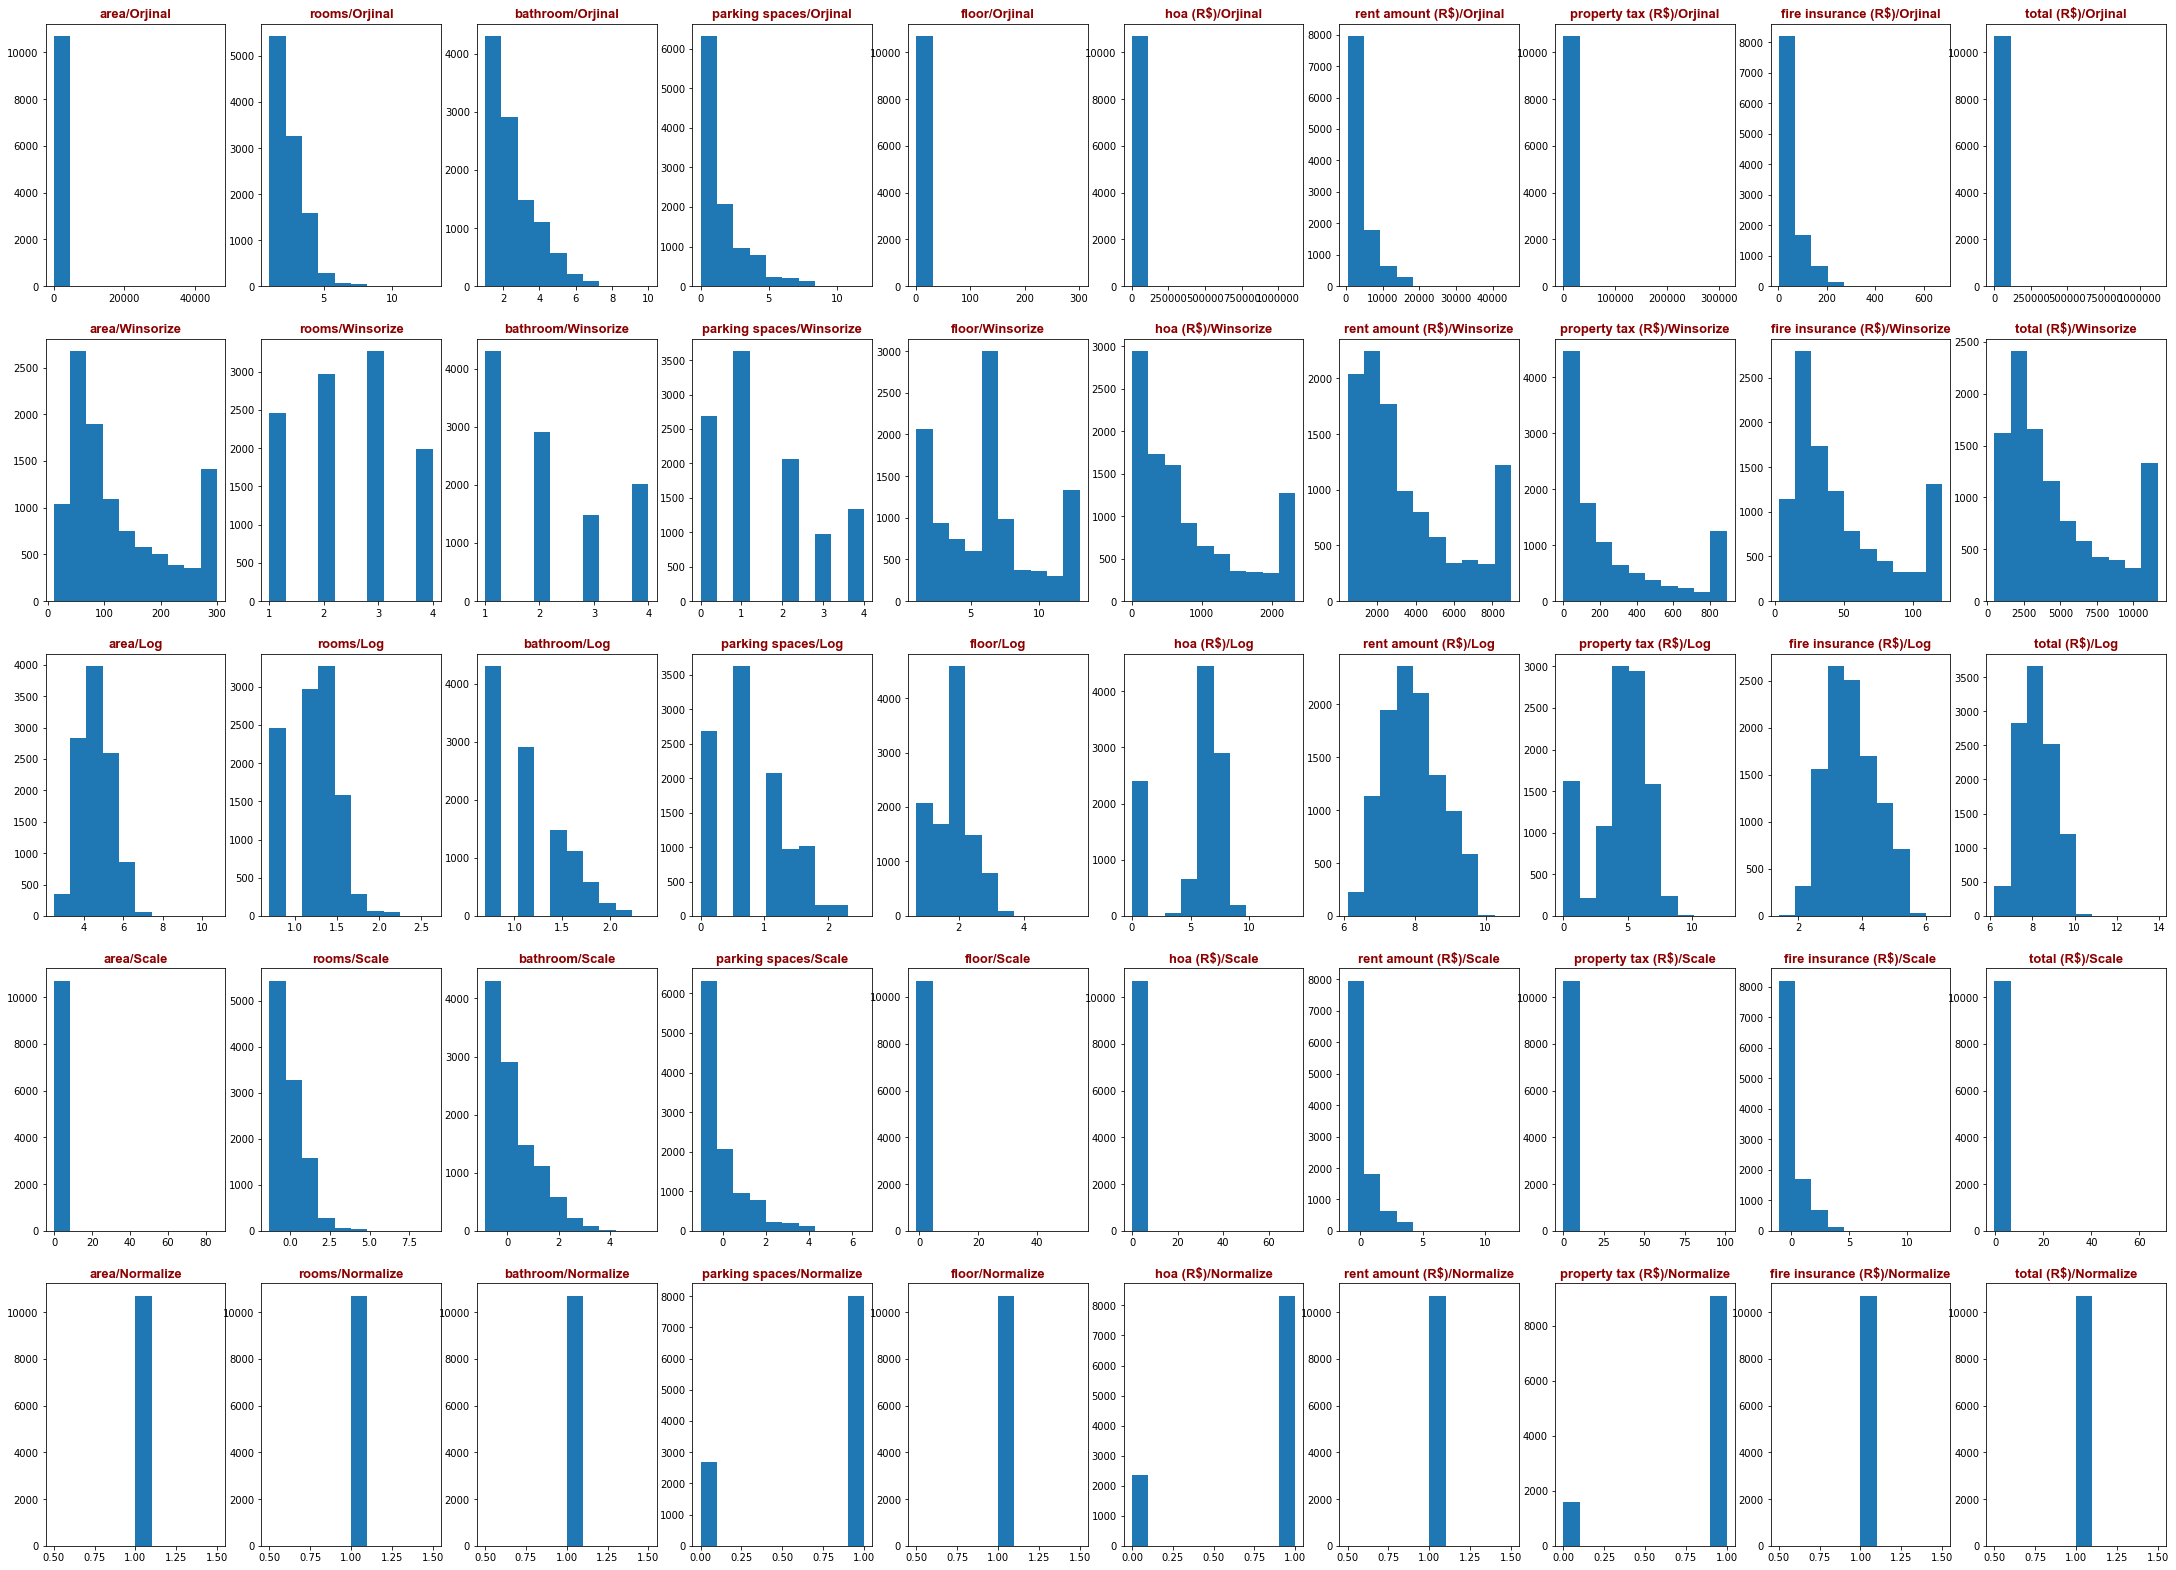

In [13]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
curve_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(38,28))

columns=[ 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
         'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']

for i in range(10):
    plt.subplot(5, 10, i+1)
    plt.hist(df[columns[i]])
    plt.title(columns[i]+str("/Orjinal")  , fontdict=title_font)
for i in range(10):
    plt.subplot(5, 10, i+11)
    plt.hist(winsorize(df[columns[i]], (0, 0.10)))
    plt.title(columns[i]+str("/Winsorize")  , fontdict=title_font)
for i in range(10):
    plt.subplot(5, 10, i+21)
    plt.hist(np.log(df[columns[i]]+1))
    plt.title(columns[i]+str("/Log")  , fontdict=title_font)
for i in range(10):
    plt.subplot(5, 10, i+31)
    plt.hist(scale(df[columns[i]]))
    plt.title(columns[i]+str("/Scale")  , fontdict=title_font)
for i in range(10):
    plt.subplot(5, 10, i+41)
    plt.hist(normalize(np.array(df[columns[i]]).reshape(1,-1).reshape(-1,1)))
    plt.title(columns[i]+str("/Normalize")  , fontdict=title_font)

# BoxPlot

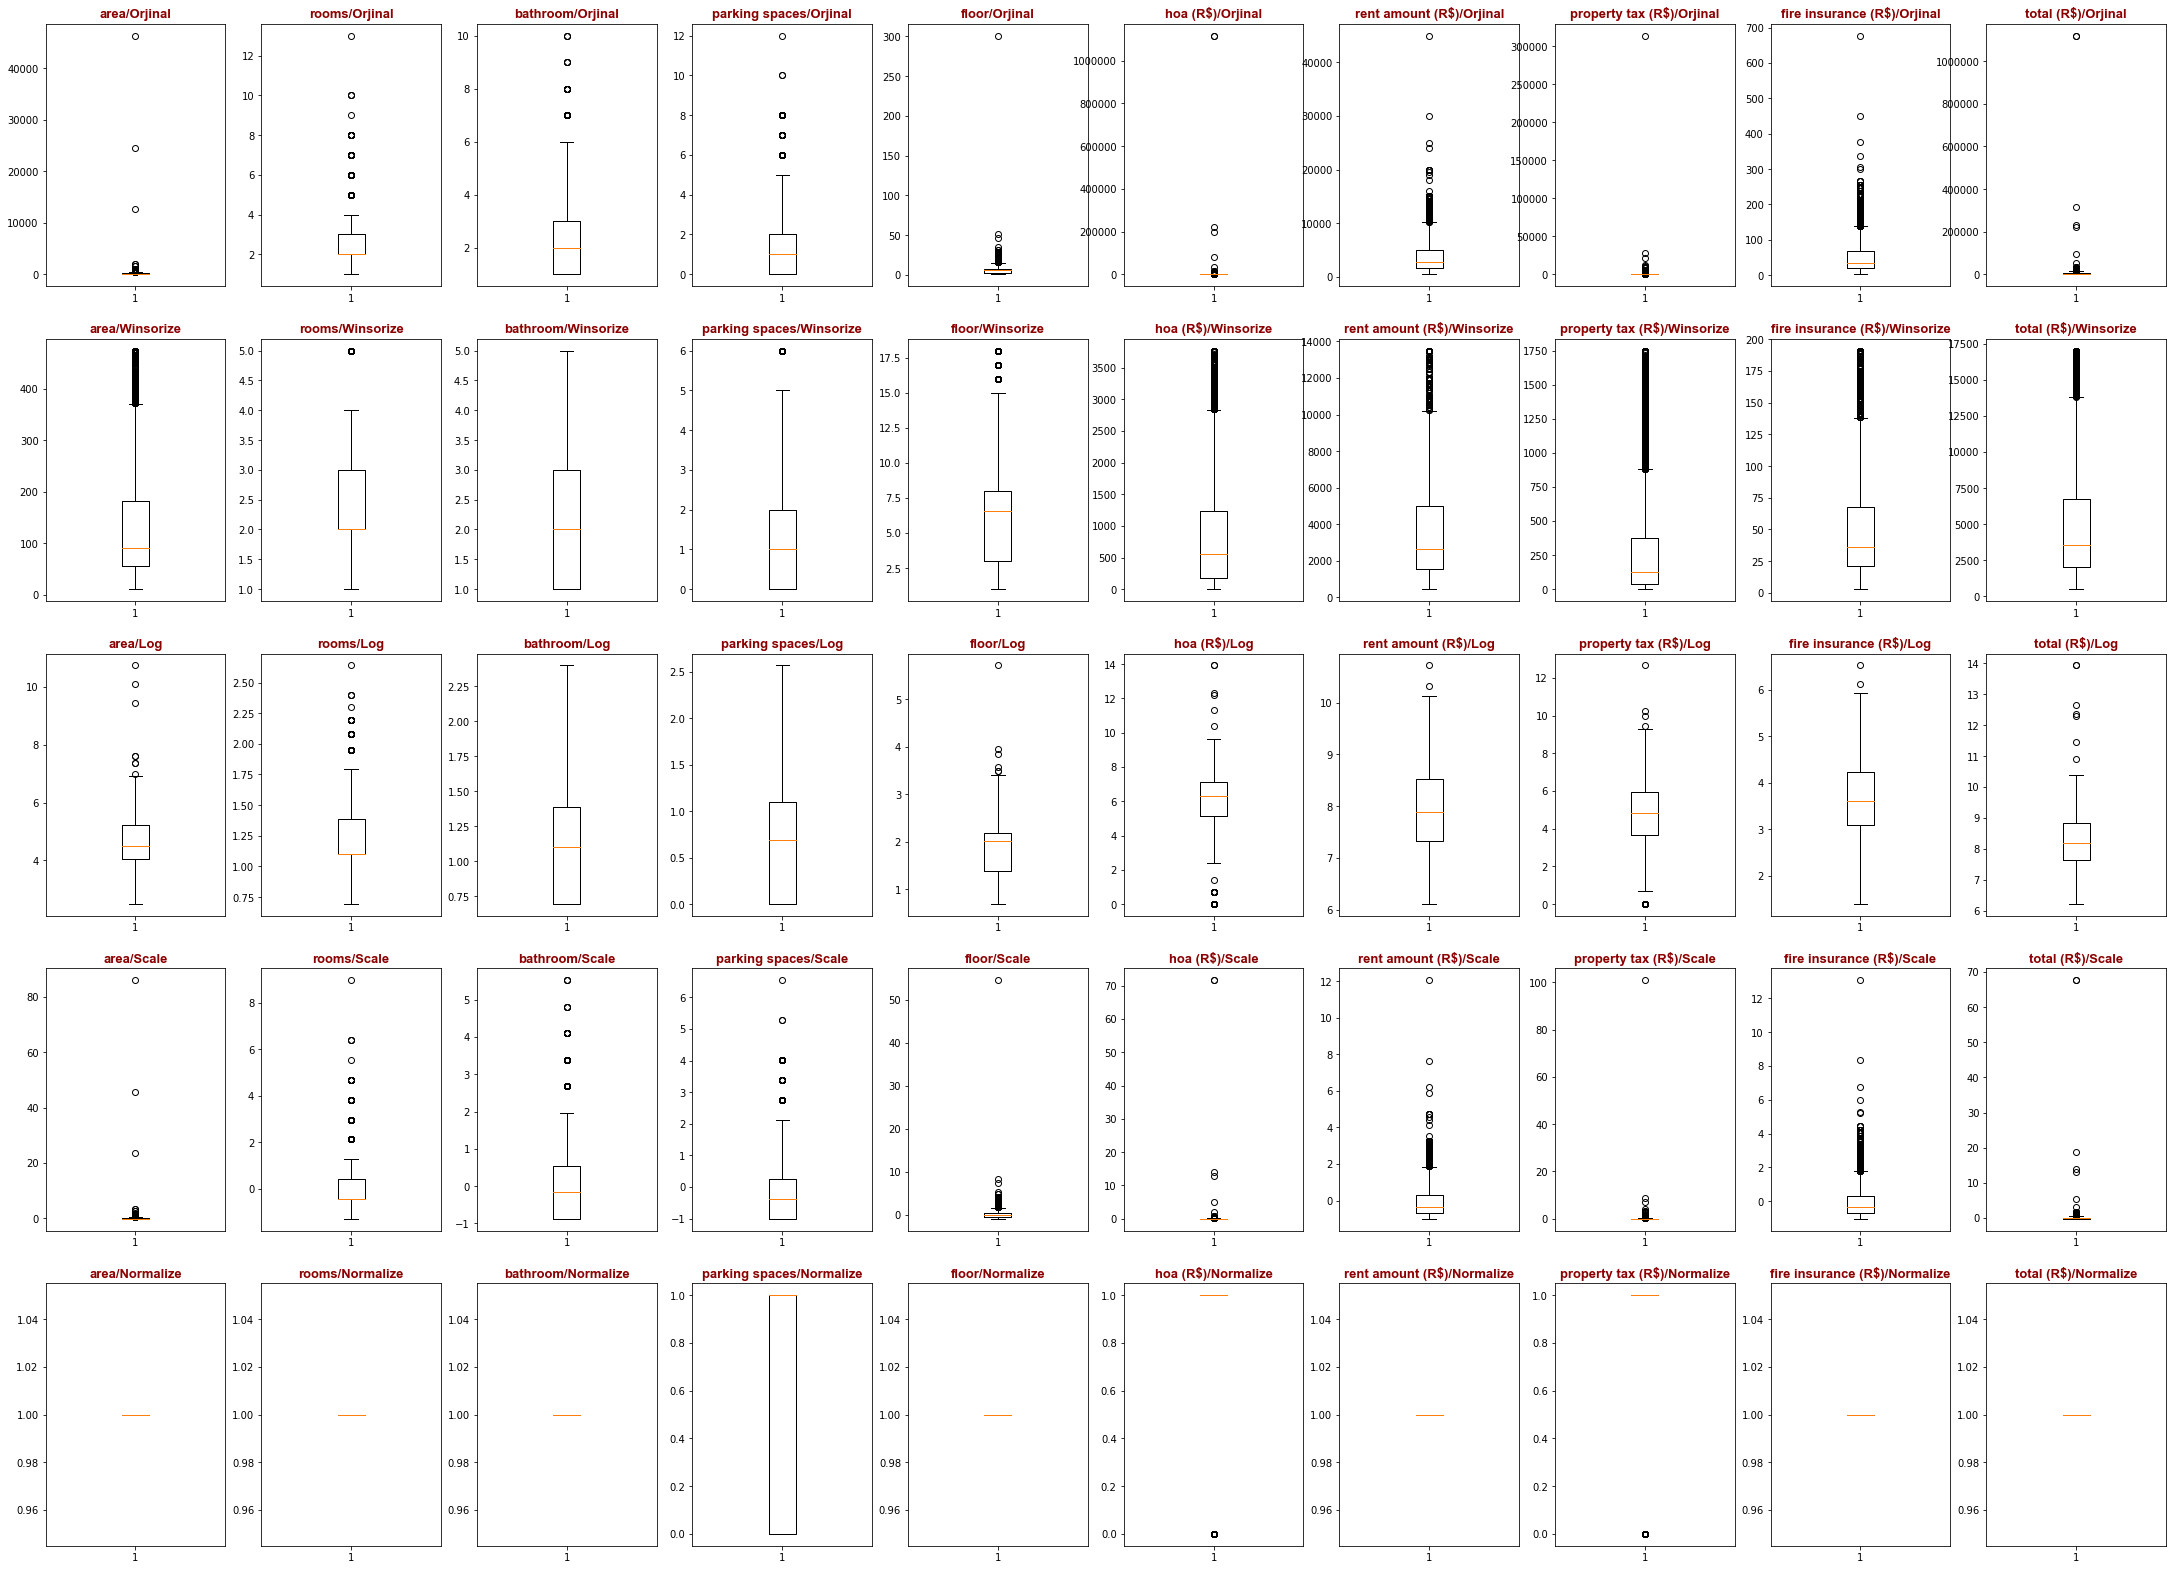

In [14]:
plt.figure(figsize=(38,28))

columns=[ 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
         'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']

for i in range(10):
    plt.subplot(5, 10, i+1)
    plt.boxplot(df[columns[i]])
    plt.title(columns[i]+str("/Orjinal")  , fontdict=title_font)
for i in range(10):
    plt.subplot(5, 10, i+11)
    plt.boxplot(winsorize(df[columns[i]], (0, 0.03))) # %95
    plt.title(columns[i]+str("/Winsorize")  , fontdict=title_font)
for i in range(10):
    plt.subplot(5, 10, i+21)
    plt.boxplot(np.log(df[columns[i]]+1))
    plt.title(columns[i]+str("/Log")  , fontdict=title_font)
for i in range(10):
    plt.subplot(5, 10, i+31)
    plt.boxplot(scale(df[columns[i]]))
    plt.title(columns[i]+str("/Scale")  , fontdict=title_font)
for i in range(10):
    plt.subplot(5, 10, i+41)
    plt.boxplot(normalize(np.array(df[columns[i]]).reshape(1,-1).reshape(-1,1)))
    plt.title(columns[i]+str("/Normalize")  , fontdict=title_font)

As we understand from Boxplot and Histogram graphics, the best ways to get rid of outliers are winsorized and transform logarithms.
Now, if you transform or winsorize our data into a logarithm, how much will we be outliers? let's find it

# IQR Method

In [15]:
log_threshold_variables= pd.DataFrame()
variables = [ 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
         'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)']
for j in variables:
    for threshold_worth in np.arange(1,5,1):
        
        #logarithm Transformed
        q75_log, q25_log = np.percentile(np.log(df[j]), [75 ,25])
        caa_log = q75_log - q25_log
        
        #Orjinal Data
        q75, q25 = np.percentile(df[j], [75 ,25])
        caa= q75 - q25
        
        # Winsorize Data
        q75_win, q25_win = np.percentile(winsorize(df[j],(0, 0.03)), [75 ,25])
        caa_win= q75 - q25
        
        #logarithm Transformed
        min_worth_log = q25_log - (caa_log*threshold_worth)
        max_worth_log = q75_log + (caa_log*threshold_worth)
        
        #Orjinal Data
        min_worth= q25 - (caa*threshold_worth) 
        max_worth = q75 + (caa*threshold_worth) 
        
        # Winsorize Data
        min_worth_win= q25_win - (caa_win*threshold_worth) 
        max_worth_win = q75_win + (caa_win*threshold_worth)
        
        number_of_outliers_log = len((np.where((np.log(df[j]) > max_worth_log)| 
                                               (np.log(df[j]) < min_worth_log))[0]))
        
        number_of_outliers = len((np.where((df[j] > max_worth)| 
                                               (df[j] < min_worth))[0]))
        
        number_of_outliers_win = len((np.where((winsorize(df[j],(0, 0.03)) > max_worth_win)| 
                                               (winsorize(df[j],(0, 0.03)) < min_worth_win))[0]))
        
        log_threshold_variables = log_threshold_variables.append({'threshold_worth': threshold_worth,
                                                            'number_of_outliers' : number_of_outliers, 
                                                            'number_of_outliers_log': number_of_outliers_log,
                                                            "number_of_outliers_win":number_of_outliers_win
                                                            }, ignore_index=True)
    print("-"*10,"",j,"-"*10)
    display(log_threshold_variables)
    log_threshold_variables = pd.DataFrame()

----------  area ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,1038.0,208.0,1038.0,1.0
1,418.0,5.0,418.0,2.0
2,180.0,3.0,0.0,3.0
3,96.0,2.0,0.0,4.0


----------  rooms ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,408.0,2862.0,408.0,1.0
1,120.0,52.0,0.0,2.0
2,52.0,1.0,0.0,3.0
3,16.0,0.0,0.0,4.0


----------  bathroom ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,318.0,3.0,0.0,1.0
1,18.0,0.0,0.0,2.0
2,3.0,0.0,0.0,3.0
3,0.0,0.0,0.0,4.0


----------  parking spaces ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,552.0,0.0,552.0,1.0
1,159.0,0.0,0.0,2.0
2,3.0,0.0,0.0,3.0
3,1.0,0.0,0.0,4.0


----------  floor ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,874.0,1219.0,874.0,1.0
1,277.0,1.0,0.0,2.0
2,89.0,1.0,0.0,3.0
3,11.0,0.0,0.0,4.0


----------  hoa (R$) ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,1085.0,2424.0,1085.0,1.0
1,446.0,2409.0,446.0,2.0
2,174.0,2375.0,0.0,3.0
3,80.0,2373.0,0.0,4.0


----------  rent amount (R$) ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,1191.0,14.0,1191.0,1.0
1,569.0,0.0,569.0,2.0
2,13.0,0.0,0.0,3.0
3,11.0,0.0,0.0,4.0


----------  property tax (R$) ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,1414.0,1683.0,1414.0,1.0
1,842.0,1597.0,842.0,2.0
2,520.0,1596.0,520.0,3.0
3,331.0,1596.0,331.0,4.0


----------  fire insurance (R$) ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,1189.0,134.0,1189.0,1.0
1,514.0,0.0,514.0,2.0
2,143.0,0.0,0.0,3.0
3,10.0,0.0,0.0,4.0


----------  total (R$) ----------


,number_of_outliers,number_of_outliers_log,number_of_outliers_win,threshold_worth
0,1100.0,76.0,1100.0,1.0
1,413.0,6.0,413.0,2.0
2,92.0,3.0,0.0,3.0
3,23.0,2.0,0.0,4.0


Here, we can focus on our target variable 'total'. the target variable has less contradictory value when converted to logarithm
however, it should be noted that winsorize is clear of all outliers for us in the 3 * IQR.In these situations, we can make a wrong decision these between dataframe. Therefore, we have to study both.

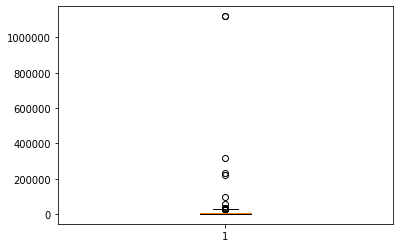

In [16]:
plt.boxplot(df['total (R$)'], whis=4) # Not log transformed whis = 4 
plt.show()

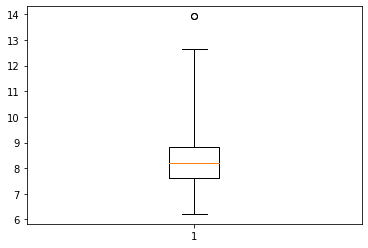

In [17]:
plt.boxplot(np.log(df['total (R$)']), whis=4) # log Transformed whis = 4 
plt.show()

# Encoder Transform

In [18]:
df["city"]= df["city"].replace({"São Paulo":0, 'Porto Alegre':1, 'Rio de Janeiro':2, 'Campinas':3,'Belo Horizonte':4})
df['animal']= pd.get_dummies(df['animal'],drop_first=True)
df['furniture']= pd.get_dummies(df['furniture'],drop_first=True)

# Log Transform Data

In [19]:
df_log= df[['area','rooms',"bathroom","parking spaces","floor","hoa (R$)","rent amount (R$)","property tax (R$)","fire insurance (R$)","total (R$)"]]

df_add=df[['city',"animal","furniture"]] # Not Transform Log because we apply get_dummies() these columns

df_log = np.log(df_log+1) # We don't want taking -inf values in dataframe. 


df_log=pd.concat([df_log,df_add],axis=1)
df_log.head()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city,animal,furniture
0,4.262680,1.098612,0.693147,0.693147,2.079442,7.633370,8.101981,5.356586,3.761200,8.633909,0,0,0
1,5.771441,1.609438,1.609438,0.000000,3.044522,7.090910,8.509363,7.467942,4.158883,8.983942,0,0,1
2,4.394449,0.693147,0.693147,0.693147,1.945910,6.908755,7.937732,0.000000,3.737670,8.253748,1,0,1
3,3.951244,1.098612,0.693147,0.000000,1.098612,5.602119,7.014814,3.135494,2.890372,7.259820,1,0,1
4,3.258097,0.693147,0.693147,0.000000,0.693147,0.000000,6.685861,3.258097,2.484907,6.729824,0,1,1


In [20]:
# IQR* 4 Log Transform

q1 = df_log['total (R$)'].quantile(0.25)
q3 = df_log['total (R$)'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+4*iqr #acceptable range
low,high

(5.84932528560625, 13.57336201875238)

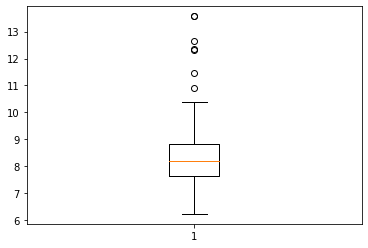

In [21]:
# IQR* 4 Log Transform Boxplot

df_log['total (R$)']=np.where(df_log['total (R$)'] > high,high,df_log['total (R$)']) # upper limit

plt.boxplot(df_log['total (R$)'])
plt.show()

# Correlation

In [22]:
df_corr=df_log.corr()
df_corr

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city,animal,furniture
area,1.000000,0.818556,0.817274,0.692502,0.162223,-0.097273,0.724577,0.557418,0.744819,0.733134,-0.027068,-0.179791,0.037605
rooms,0.818556,1.000000,0.746619,0.621354,0.092910,-0.043349,0.582250,0.482588,0.596227,0.593848,0.050885,-0.190137,0.096416
bathroom,0.817274,0.746619,1.000000,0.686058,0.188485,-0.000234,0.715304,0.533197,0.721460,0.734187,-0.086215,-0.131355,-0.012373
parking spaces,0.692502,0.621354,0.686058,1.000000,0.187787,-0.016432,0.607261,0.468019,0.612533,0.621636,-0.061166,-0.135750,-0.004919
floor,0.162223,0.092910,0.188485,0.187787,1.000000,0.008026,0.260309,0.152189,0.256836,0.258258,-0.159432,-0.017167,-0.046661
hoa (R$),-0.097273,-0.043349,-0.000234,-0.016432,0.008026,1.000000,0.054650,0.139210,-0.026869,0.227663,-0.015153,-0.003369,-0.162794
rent amount (R$),0.724577,0.582250,0.715304,0.607261,0.260309,0.054650,1.000000,0.523891,0.985634,0.960366,-0.230782,-0.082826,-0.211923
property tax (R$),0.557418,0.482588,0.533197,0.468019,0.152189,0.139210,0.523891,1.000000,0.525491,0.596096,-0.022503,-0.122117,-0.050485
fire insurance (R$),0.744819,0.596227,0.721460,0.612533,0.256836,-0.026869,0.985634,0.525491,1.000000,0.934749,-0.209462,-0.091428,-0.191177
total (R$),0.733134,0.593848,0.734187,0.621636,0.258258,0.227663,0.960366,0.596096,0.934749,1.000000,-0.225350,-0.088945,-0.208799


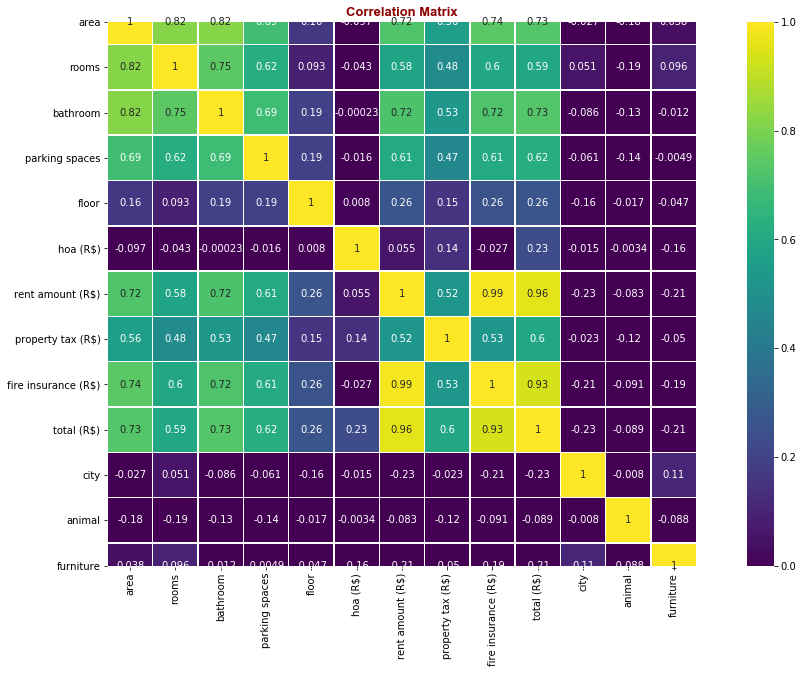

In [23]:
plt.figure(figsize=(18,10))
ax=sns.heatmap(df_corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
ax.set_ylim(13,0)
plt.title("Correlation Matrix", fontdict=title_font)

plt.show()

# Be Carefull

 Before moving on to modeling, we need to leave hoa (R) + 𝑟𝑒𝑛𝑡𝑎𝑚𝑜𝑢𝑛𝑡 (𝑅) + real estate tax (R) + 𝑓𝑖𝑟𝑒𝑖𝑛𝑠𝑢𝑟𝑎𝑛𝑐𝑒 (𝑅) columns in our data. Because when we add these variables, we reach our target variable. The variables I mentioned statistically are the variables that determine our target variable. If these variables were given to us, we would collect and reach our target variable directly. Therefore, if we are not guessing one of these variables, we must delete them and focus on other variables that affect our Target variable.

##### We drop these variables from our dataframe before the model because it can negatively affect the metrics of our model.

In [24]:
df_log=df_log.drop(["rent amount (R$)","property tax (R$)","fire insurance (R$)","hoa (R$)"], axis=1)
df_log.head()

,area,rooms,bathroom,parking spaces,floor,total (R$),city,animal,furniture
0,4.262680,1.098612,0.693147,0.693147,2.079442,8.633909,0,0,0
1,5.771441,1.609438,1.609438,0.000000,3.044522,8.983942,0,0,1
2,4.394449,0.693147,0.693147,0.693147,1.945910,8.253748,1,0,1
3,3.951244,1.098612,0.693147,0.000000,1.098612,7.259820,1,0,1
4,3.258097,0.693147,0.693147,0.000000,0.693147,6.729824,0,1,1


# Winsorize Data and threshold = 0

In [25]:
df_win = df.copy()

In [26]:
df_win['total (R$)'] = winsorize(df['total (R$)'], (0, 0.03))

In [27]:
df_win=df_win.drop(["rent amount (R$)","property tax (R$)","fire insurance (R$)","hoa (R$)"], axis=1)
df_win.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
0,0,70,2,1,1,7.0,0,0,5618
1,0,320,4,4,0,20.0,0,1,7973
2,1,80,1,1,1,6.0,0,1,3841
3,1,51,2,1,0,2.0,0,1,1421
4,0,25,1,1,0,1.0,1,1,836


# Winsorize Data and threshold = 1

In [28]:
df_win_1 = df.copy()

In [29]:
df_win_1['total (R$)'] = winsorize(df['total (R$)'], (0, 0.03))
df_win_1=df_win_1.drop(["rent amount (R$)","property tax (R$)","fire insurance (R$)","hoa (R$)"], axis=1)

In [30]:
df_win_1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
0,0,70,2,1,1,7.0,0,0,5618
1,0,320,4,4,0,20.0,0,1,7973
2,1,80,1,1,1,6.0,0,1,3841
3,1,51,2,1,0,2.0,0,1,1421
4,0,25,1,1,0,1.0,1,1,836


In [31]:
# IQR* 1 Log Transform
q1 = df_win_1['total (R$)'].quantile(0.25)
q3 = df_win_1['total (R$)'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1*iqr #acceptable range
low,high

(-4997.625, 11474.25)

In [32]:
df_win_1['total (R$)']=np.where(df_win_1['total (R$)'] > high,high,df_win_1['total (R$)']) # upper limit

# Winsorize Data and threshold = 2

In [33]:
df_win_2 = df.copy()

In [34]:
df_win_2['total (R$)'] = winsorize(df['total (R$)'], (0, 0.03))
df_win_2=df_win_2.drop(["rent amount (R$)","property tax (R$)","fire insurance (R$)","hoa (R$)"], axis=1)

In [35]:
df_win_2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
0,0,70,2,1,1,7.0,0,0,5618
1,0,320,4,4,0,20.0,0,1,7973
2,1,80,1,1,1,6.0,0,1,3841
3,1,51,2,1,0,2.0,0,1,1421
4,0,25,1,1,0,1.0,1,1,836


In [36]:
# IQR* 1 Log Transform
q1 = df_win_2['total (R$)'].quantile(0.25)
q3 = df_win_2['total (R$)'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+2*iqr #acceptable range
low,high

(-4997.625, 16180.5)

In [37]:
df_win_2['total (R$)']=np.where(df_win_2['total (R$)'] > high,high,df_win_2['total (R$)']) # upper limit

In [38]:
df_log.to_csv('Log_Brazil')
df_win.to_csv('Winsorize_Brazil')

# Machine Learning

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error ,r2_score,explained_variance_score,max_error
from sklearn.model_selection import train_test_split, cross_val_score ,cross_val_predict,GridSearchCV, cross_validate
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
def create_model(X,y,model,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)
    model.fit(X_train, y_train)
    
    prediction_train=model.predict(X_train)
    prediction_test=model.predict(X_test)
    
    cv = cross_validate(estimator=model,X=X,y=y,cv=10,return_train_score=True)
    
    d = pd.Series({'mean_squared_error_train':mean_squared_error(y_train,prediction_train),
                   'mean_squared_error_test':mean_squared_error(y_test,prediction_test),
                   'RMSE Train':np.sqrt(mean_squared_error(y_train,prediction_train)),
                   'RMSE Test':np.sqrt(mean_squared_error(y_test,prediction_test)),
                   'r2_score_train':r2_score(y_train,prediction_train),
                   'r2_score_test':r2_score(y_test,prediction_test),
                   'explained_variance_score_train':explained_variance_score(y_train,prediction_train),
                   'explained_variance_score_test':explained_variance_score(y_test,prediction_test),
                   'max_error_train':max_error(y_train,prediction_train),
                   'max_error_test':max_error(y_test,prediction_test),
                   "Cross_val_train":cv['train_score'].mean(),
                   "Cross_val_test":cv['test_score'].mean()
                  },name=tip)
    return d

# Log Transform IQR * 4

In [41]:
X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl, y, test_size=0.20, random_state=111) 
      
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
metrics=pd.DataFrame()
metrics=metrics.append(create_model(X_scl,y,lm,tip='Log_IQR*4'))
metrics

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Log_IQR*4,0.67991,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.20562,0.691923,0.677278


# Winsorize And threshold = 0 

In [43]:
X = df_win.drop(["total (R$)"], axis=1)
y = df_win['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

lm = LinearRegression()

metrics=metrics.append(create_model(X_scl,y,lm,tip='Winsorize_IQR*0'))
metrics

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Log_IQR*4,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,1.951466e-01,2.056200e-01,0.691923,0.677278
Winsorize_IQR*0,0.561878,0.574430,2710.745972,2734.089956,0.568487,0.575148,13023.418867,16685.223200,7.348144e+06,7.475248e+06,0.568455,0.575148


# Winsorize And threshold = 1

In [44]:
X = df_win_1.drop(["total (R$)"], axis=1)
y = df_win_1['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

lm = LinearRegression()

metrics=metrics.append(create_model(X_scl,y,lm,tip='Winsorize_IQR*1'))
metrics

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Log_IQR*4,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,1.951466e-01,2.056200e-01,0.691923,0.677278
Winsorize_IQR*0,0.561878,0.574430,2710.745972,2734.089956,0.568487,0.575148,13023.418867,16685.223200,7.348144e+06,7.475248e+06,0.568455,0.575148
Winsorize_IQR*1,0.600379,0.608727,2106.397066,2112.055134,0.602153,0.609795,8403.542423,13968.168316,4.436909e+06,4.460777e+06,0.602115,0.609795


# Winsorize And threshold = 2

In [45]:
X = df_win_2.drop(["total (R$)"], axis=1)
y = df_win_2['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

lm = LinearRegression()

metrics=metrics.append(create_model(X_scl,y,lm,tip='Winsorize_IQR*2'))
metrics

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Log_IQR*4,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,1.951466e-01,2.056200e-01,0.691923,0.677278
Winsorize_IQR*0,0.561878,0.574430,2710.745972,2734.089956,0.568487,0.575148,13023.418867,16685.223200,7.348144e+06,7.475248e+06,0.568455,0.575148
Winsorize_IQR*1,0.600379,0.608727,2106.397066,2112.055134,0.602153,0.609795,8403.542423,13968.168316,4.436909e+06,4.460777e+06,0.602115,0.609795
Winsorize_IQR*2,0.567096,0.579108,2650.948029,2664.979756,0.572237,0.580080,12179.225533,16394.542332,7.027525e+06,7.102117e+06,0.572210,0.580080


Yes. It seems that our best model is our logarithm transform and IQR * 4 dataset. Cross Validate and RMSE Test values are the best ones
It seems,. Then we will do the modeling process with this dataframe.

# Linear Model

In [46]:
X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

lm = LinearRegression()

models= pd.DataFrame()
models=models.append(create_model(X_scl,y,lm,tip='Linear_Model'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.67991,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.20562,0.691923,0.677278


# KNN Model

In [47]:
X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

Knn=KNeighborsRegressor(n_neighbors=5)

models=models.append(create_model(X_scl,y,Knn,tip='Knn_model'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247


# Model Tuning

In [55]:
Knn=KNeighborsRegressor()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='r2')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsRegressor(n_neighbors=23)
The best score: 0.7398836751207188


In [48]:
Knn = KNeighborsRegressor(n_neighbors=23)

models=models.append(create_model(X_scl,y,Knn,tip='Knn_model_Tuning'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918


# CART MODEL

In [49]:
X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

cart_model = DecisionTreeRegressor()

models=models.append(create_model(X_scl,y,cart_model,tip='cart_model'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577


# Model Tuning

In [50]:
cart_params= {'min_samples_split':range(2,20), 
             "max_leaf_nodes":range(2,10),
             "max_features":range(0,5)}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

cart_cv_model.fit(X_train,y_train)
print("The best Parameters"+str(cart_cv_model.best_params_))

The best Parameters{'max_features': 4, 'max_leaf_nodes': 9, 'min_samples_split': 2}


In [51]:
cart_model = DecisionTreeRegressor(max_features=4 , max_leaf_nodes=9 , min_samples_split=2 )

models=models.append(create_model(X_scl,y,cart_model,tip='cart_model_tuning'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742


# Random Forest

In [52]:
X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

random_model = RandomForestRegressor(n_estimators=25, random_state=2)

models=models.append(create_model(X_scl,y,random_model,tip='random_model'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964


# Model Tuning

In [67]:
rf_params = {'max_depth': [2,3,5,8,10],
            "max_features":[1,2,3,4],
            "min_samples_split":[2,5,40]}

rf_cv_model= GridSearchCV(random_model, rf_params , cv=10)

rf_cv_model.fit(X_train,y_train)
print("The best paramters :"+str(rf_cv_model.best_params_))

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=10, max_features=4,
                                             min_samples_split=20,
                                             n_estimators=25, random_state=2),
             param_grid={'max_depth': [2, 3, 5, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 40]})

In [53]:
random_model = RandomForestRegressor(n_estimators=25, random_state=2,max_depth=10, max_features=4 ,min_samples_split=5)

models=models.append(create_model(X_scl,y,random_model,tip='random_model_tuning'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957


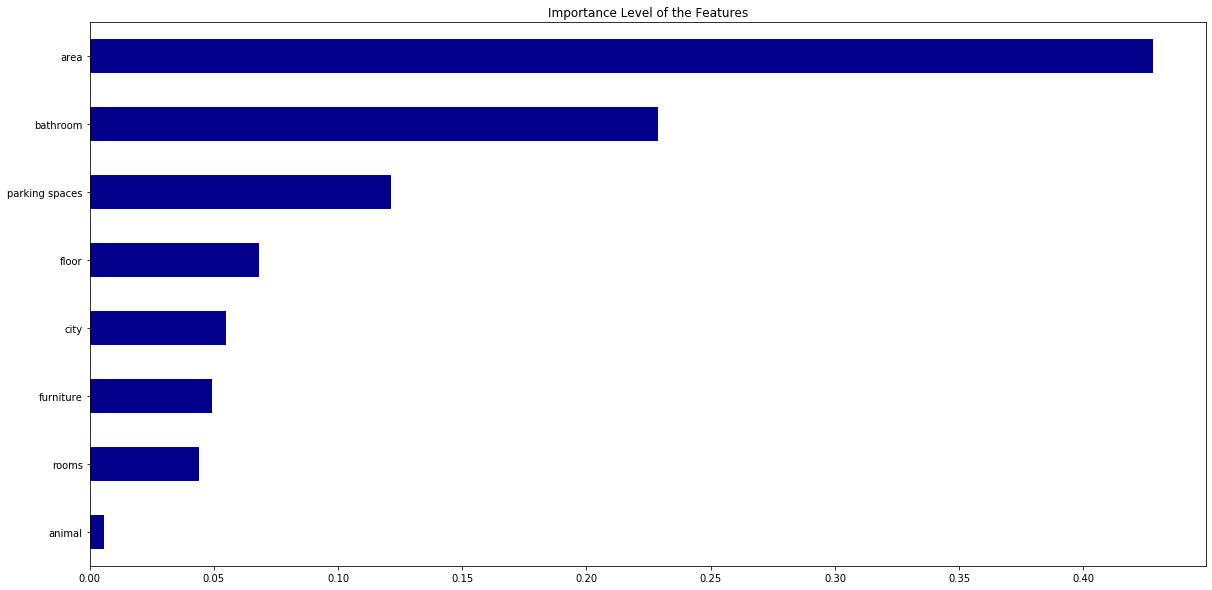

In [54]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=random_model.feature_importances_,
                        index= X.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

# SVM Model

In [55]:
from sklearn.svm import SVR

X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

svm_model = SVR()

models=models.append(create_model(X_scl,y,svm_model,tip='svm_model'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266


# Model Tuning

In [74]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}

svr_cv_model = GridSearchCV(svm_model,svr_params, cv=10 ).fit(X_train,y_train)

print("The Best Parameters :"+str(svr_cv_model.best_params_))

{'C': 1.9000000000000001}

In [56]:
svm_model = SVR(C=1.9000000000000001)

models=models.append(create_model(X_scl,y,svm_model,tip='svm_model_Tuning'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266
svm_model_Tuning,0.732398,0.757441,0.407951,0.392969,0.737271,0.757963,2.967248,4.636199,0.166424,0.154424,0.737267,0.757630


# Bagging Trees

In [57]:
from sklearn.ensemble import BaggingRegressor

X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

bag_model = BaggingRegressor(bootstrap_features=True)

models=models.append(create_model(X_scl,y,bag_model,tip='bag_model'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266
svm_model_Tuning,0.732398,0.757441,0.407951,0.392969,0.737271,0.757963,2.967248,4.636199,0.166424,0.154424,0.737267,0.757630
bag_model,0.743985,0.883366,0.431480,0.326298,0.706621,0.832893,3.033801,3.221131,0.186175,0.106471,0.706087,0.832893


# Model Tuning

In [77]:
bag_params = {"n_estimators": range(2,20)}

bag_cv_model = GridSearchCV(bag_model,bag_params, cv=10 ).fit(X_train,y_train)

bag_cv_model.best_params_

{'n_estimators': 17}

In [58]:
bag_model = BaggingRegressor(n_estimators=17, random_state=45)

models=models.append(create_model(X_scl,y,bag_model,tip='bag_model_tuning'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266
svm_model_Tuning,0.732398,0.757441,0.407951,0.392969,0.737271,0.757963,2.967248,4.636199,0.166424,0.154424,0.737267,0.757630
bag_model,0.743985,0.883366,0.431480,0.326298,0.706621,0.832893,3.033801,3.221131,0.186175,0.106471,0.706087,0.832893


# XGBoost

In [60]:
from xgboost import XGBRegressor

X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

xgb = XGBRegressor(base_score=0.5, verbose=False)

models=models.append(create_model(X_scl,y,xgb,tip='xgb_model'))
models

[06:03:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266
svm_model_Tuning,0.732398,0.757441,0.407951,0.392969,0.737271,0.757963,2.967248,4.636199,0.166424,0.154424,0.737267,0.757630
bag_model,0.743985,0.883366,0.431480,0.326298,0.706621,0.832893,3.033801,3.221131,0.186175,0.106471,0.706087,0.832893


# Model Tuning

In [81]:
xgb_params = {'colsample_bytree':[0.4,0.5,0.6, 0.9, 1],
             "n_estimators":[100,200,500,1000],
             "max_depth":[2,3,4,5,6],
             "learning_rate":[0.1,0.01,0.5]}

xgb_cv_model = GridSearchCV(xgb,xgb_params, cv=10, n_jobs= -1 , verbose=0 )

xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 13.2min finished


[09:42:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [82]:
print("The Best Parameters :"+str(xgb_cv_model.best_params_))

The Best Parameters :{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}


In [62]:
xgb = XGBRegressor(base_score=0.5,colsample_bytree=0.9,learning_rate=0.01
                   ,max_depth=6,n_estimators=1000,verbose=False )

models=models.append(create_model(X_scl,y,xgb,tip='xgb_model_tuning'))
models

[06:03:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:03:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266
svm_model_Tuning,0.732398,0.757441,0.407951,0.392969,0.737271,0.757963,2.967248,4.636199,0.166424,0.154424,0.737267,0.757630
bag_model,0.743985,0.883366,0.431480,0.326298,0.706621,0.832893,3.033801,3.221131,0.186175,0.106471,0.706087,0.832893


# Light GBM

In [63]:
from lightgbm import LGBMRegressor

X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

lgbm = LGBMRegressor()

models=models.append(create_model(X_scl,y,lgbm,tip='lgbm_model'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266
svm_model_Tuning,0.732398,0.757441,0.407951,0.392969,0.737271,0.757963,2.967248,4.636199,0.166424,0.154424,0.737267,0.757630
bag_model,0.743985,0.883366,0.431480,0.326298,0.706621,0.832893,3.033801,3.221131,0.186175,0.106471,0.706087,0.832893


In [64]:
lgbm_params = {'colsample_bytree':[0.4,0.5,0.6, 0.9, 1],
             "n_estimators":[100,200,500,1000],
             "max_depth":[2,3,4,5,6],
             "learning_rate":[0.1,0.01,0.5]}

lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv=10, n_jobs= -1 , verbose=False )

lgbm_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=False)

In [86]:
print("The Best Parameters :"+str(lgbm_cv_model.best_params_))

The Best Parameters :{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}


In [65]:
lgbm = LGBMRegressor(colsample_bytree=0.6,learning_rate=0.01
                   ,max_depth=6,n_estimators=1000 )

models=models.append(create_model(X_scl,y,lgbm,tip='lgbm_model_tuning'))
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266
svm_model_Tuning,0.732398,0.757441,0.407951,0.392969,0.737271,0.757963,2.967248,4.636199,0.166424,0.154424,0.737267,0.757630
bag_model,0.743985,0.883366,0.431480,0.326298,0.706621,0.832893,3.033801,3.221131,0.186175,0.106471,0.706087,0.832893


# CatBoost

In [66]:
from catboost import CatBoostRegressor

X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

catboost_model = CatBoostRegressor(verbose=False)

models=models.append(create_model(X_scl,y,catboost_model,tip='catboost_model'))

In [67]:
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266
svm_model_Tuning,0.732398,0.757441,0.407951,0.392969,0.737271,0.757963,2.967248,4.636199,0.166424,0.154424,0.737267,0.757630
bag_model,0.743985,0.883366,0.431480,0.326298,0.706621,0.832893,3.033801,3.221131,0.186175,0.106471,0.706087,0.832893


# Model Tuning

In [73]:
catb_params = {
    "iterations":[200,500,1000],
    "learning_rate":[0.01,0.03,0.05,0.1],
    "depth":[3,4,5,6,7,8]}

cat_cv_model = GridSearchCV(catboost_model,catb_params, cv=10, n_jobs= -1 ,verbose=False )

cat_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 28.5min finished


0:	learn: 0.7723962	total: 3.84ms	remaining: 1.92s
1:	learn: 0.7481727	total: 7.44ms	remaining: 1.85s
2:	learn: 0.7251915	total: 11ms	remaining: 1.82s
3:	learn: 0.7043000	total: 14.4ms	remaining: 1.78s
4:	learn: 0.6842697	total: 17.7ms	remaining: 1.75s
5:	learn: 0.6652240	total: 21ms	remaining: 1.73s
6:	learn: 0.6476464	total: 24.3ms	remaining: 1.71s
7:	learn: 0.6315343	total: 28ms	remaining: 1.72s
8:	learn: 0.6154146	total: 31.5ms	remaining: 1.72s
9:	learn: 0.6005605	total: 39.4ms	remaining: 1.93s
10:	learn: 0.5870615	total: 42.8ms	remaining: 1.9s
11:	learn: 0.5743550	total: 46.2ms	remaining: 1.88s
12:	learn: 0.5627330	total: 49.6ms	remaining: 1.86s
13:	learn: 0.5514989	total: 52.9ms	remaining: 1.84s
14:	learn: 0.5412725	total: 56.3ms	remaining: 1.82s
15:	learn: 0.5315996	total: 59.6ms	remaining: 1.8s
16:	learn: 0.5230097	total: 63ms	remaining: 1.79s
17:	learn: 0.5148475	total: 66.7ms	remaining: 1.78s
18:	learn: 0.5071568	total: 70.3ms	remaining: 1.78s
19:	learn: 0.4984605	total: 74.1

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002D00DC1C5C8>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [74]:
print("The Best Parameters :"+str(cat_cv_model.best_params_))

The Best Parameters :{'depth': 7, 'iterations': 500, 'learning_rate': 0.05}


In [68]:
catboost_model = CatBoostRegressor(depth=7 , iterations=500, learning_rate= 0.05,verbose=False)

models=models.append(create_model(X_scl,y,catboost_model,tip='catboost_model_tuning'))
models

In [69]:
models

,Cross_val_test,Cross_val_train,RMSE Test,RMSE Train,explained_variance_score_test,explained_variance_score_train,max_error_test,max_error_train,mean_squared_error_test,mean_squared_error_train,r2_score_test,r2_score_train
Linear_Model,0.679910,0.680401,0.441754,0.453453,0.692191,0.677278,2.734249,5.236808,0.195147,0.205620,0.691923,0.677278
Knn_model,0.715675,0.811907,0.424101,0.346789,0.716079,0.811457,2.574541,3.900858,0.179862,0.120263,0.716053,0.811247
Knn_model_Tuning,0.722468,0.746699,0.413926,0.405506,0.729563,0.742462,2.851452,5.307724,0.171335,0.164435,0.729515,0.741918
cart_model,0.584791,0.986219,0.510381,0.088967,0.590049,0.987577,3.892971,0.892059,0.260488,0.007915,0.588769,0.987577
cart_model_tuning,0.606021,0.606228,0.511128,0.501832,0.588154,0.604742,3.149045,4.979700,0.261251,0.251836,0.587564,0.604742
random_model,0.748046,0.952154,0.402971,0.173115,0.744535,0.952964,2.807418,2.672145,0.162386,0.029969,0.743643,0.952964
random_model_tuning,0.772769,0.837351,0.376982,0.320323,0.776007,0.838957,2.893016,3.365970,0.142115,0.102607,0.775644,0.838957
svm_model,0.730098,0.749953,0.408676,0.399691,0.736339,0.749570,2.974461,5.007284,0.167016,0.159753,0.736332,0.749266
svm_model_Tuning,0.732398,0.757441,0.407951,0.392969,0.737271,0.757963,2.967248,4.636199,0.166424,0.154424,0.737267,0.757630
bag_model,0.743985,0.883366,0.431480,0.326298,0.706621,0.832893,3.033801,3.221131,0.186175,0.106471,0.706087,0.832893


As you can see, our model that best describes and predicts our data was the Cat Boost Algorithm.

# Result CatBoost

In [71]:
X = df_log.drop(["total (R$)"], axis=1)
y = df_log['total (R$)']

scaler= StandardScaler()
X_scl= scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl, y, test_size=0.20, random_state=111)

catboost_model = CatBoostRegressor(depth=7 , iterations=500, learning_rate= 0.05,verbose=False).fit(X,y)

print(catboost_model.get_scale_and_bias())

(1.0, 8.243122100830078)


In [78]:
catboost_model.get_feature_importance(data=None,prettified=False,thread_count=-1,verbose=False,)

array([26.03681985,  5.60436687, 13.64171516,  7.6913577 , 18.73900675,
       17.16975768,  1.34374804,  9.77322794])

In [86]:
print("Total = '8.243122100830078 + area * 26.03681985 + rooms * 5.60436687 + bathroom * 13.64171516 + parking spaces * 7.6913577 + floor * 18.73900675 +" 
      ,"city *17.16975768 + animal * 1.34374804 + furniture * 9.77322794  ")

Total = '8.243122100830078 + area * 26.03681985 + rooms * 5.60436687 + bathroom * 13.64171516 + parking spaces * 7.6913577 + floor * 18.73900675 + city *17.16975768 + animal * 1.34374804 + furniture * 9.77322794  


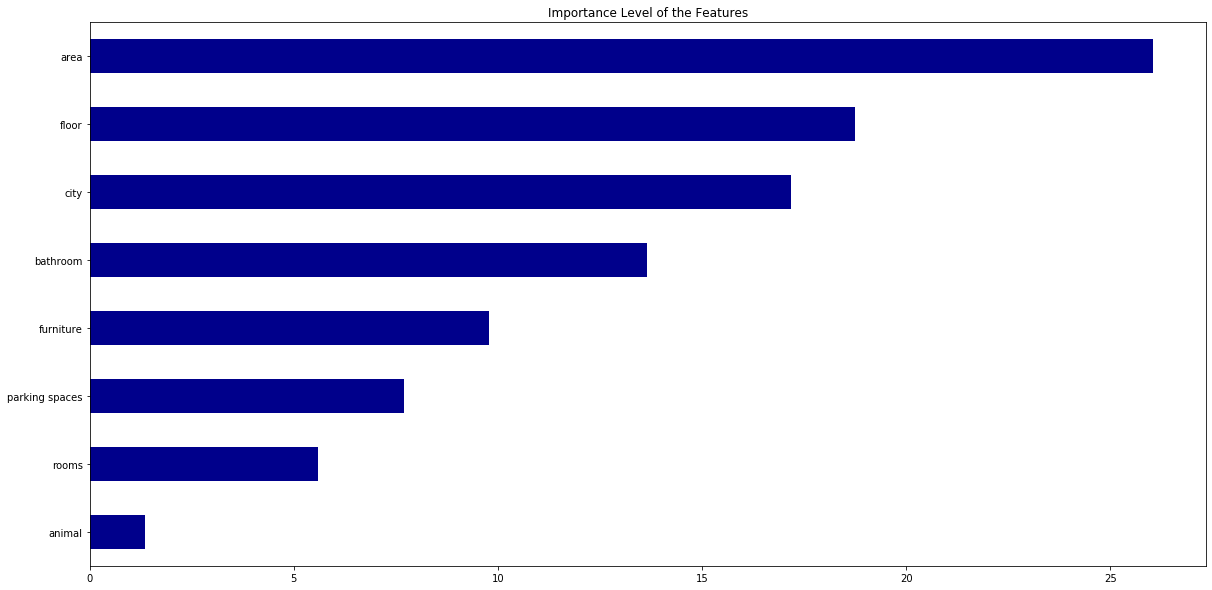

In [79]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=catboost_model.feature_importances_,
                        index= X.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()